In [33]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df1 = pd.read_csv('/content/drive/MyDrive/iot imbalanced data 1-1', sep='\t')

df1.head(5)

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.545404e+09,CrDn63WjJEmrWGjqf,192.168.1.195,41040,185.244.25.235,80,tcp,-,3.139211,0,0,S0,-,-,0,S,3,180,0,0,-,Benign,-
1,1.545404e+09,CY9lJW3gh1Eje4usP6,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,-,Benign,-
2,1.545404e+09,CcFXLynukEDnUlvgl,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,-,Benign,-
3,1.545404e+09,CDrkrSobGYxHhYfth,192.168.1.195,41040,185.244.25.235,80,tcp,http,1.477656,149,128252,SF,-,-,2896,ShADadttcfF,94,5525,96,139044,-,Benign,-
4,1.545404e+09,CTWZQf2oJSvq6zmPAc,192.168.1.195,41042,185.244.25.235,80,tcp,-,3.147116,0,0,S0,-,-,0,S,3,180,0,0,-,Benign,-


In [35]:
usecol =['id.orig_h','id.orig_p','id.resp_h','id.resp_p','proto','service','duration','orig_bytes','resp_bytes','conn_state','missed_bytes','history','orig_pkts','orig_ip_bytes','resp_pkts','label','detailed-label']

In [36]:
for col in df1.columns :
  print(df1[col].unique() , ":::", len(df1[col].unique()),"==", col)

[1.54540382e+09 1.54540382e+09 1.54540383e+09 ... 1.54549020e+09
 1.54549018e+09 1.54549020e+09] ::: 23145 == ts
['CrDn63WjJEmrWGjqf' 'CY9lJW3gh1Eje4usP6' 'CcFXLynukEDnUlvgl' ...
 'CXLZ3A2QY5E8weqpDk' 'CuXpFN3fWesWBXUhq1' 'Ct2Yhy4d33oL3yyZY9'] ::: 23145 == uid
['192.168.1.195' '192.168.1.1'] ::: 2 == id.orig_h
[41040 41042 41044 ... 57086 57110 57092] ::: 4383 == id.orig_p
['185.244.25.235' '147.231.100.5' '195.113.144.201' '82.113.53.40'
 '81.2.248.189' '89.221.210.188' '192.168.1.195' '81.2.254.224'
 '192.168.1.1' '194.182.80.233' '83.167.252.118' '212.96.160.147'
 '193.150.14.191' '77.78.107.252' '31.31.74.35' '109.224.76.139'
 '37.187.104.44' '78.108.102.237' '81.200.57.13' '81.0.208.219'
 '147.251.48.140' '81.2.254.32' '217.30.75.147' '185.189.115.149'
 '46.28.110.244' '94.124.107.190' '82.113.53.36' '46.28.109.26'
 '89.221.212.46' '5.1.56.123' '80.79.25.111' '37.157.194.44'
 '89.239.10.102' '89.221.214.130' '80.241.208.120' '80.190.97.205'
 '104.238.179.228' '80.151.151.109' '66.

In [37]:
chunksize = 4000
chunks = []
a = ''
for chunk in pd.read_csv('/content/drive/MyDrive/iot imbalanced data 1-1', sep='\t', chunksize=chunksize, low_memory=False,usecols=usecol):
    
    data=chunk
    for column in data.columns:
        if data[column].dtype == np.int64:
            maxVal = data[column].max()
            if maxVal < 120:
                data[column] = data[column].astype(np.int8)
            elif maxVal < 32767:
                data[column] = data[column].astype(np.int16)
            else:
                data[column] = data[column].astype(np.int32)
                
        elif data[column].dtype == np.float64:
            maxVal = data[column].max()
            minVal = data[data[column]>0][column].min()
            if maxVal < 120 and minVal>0.01 :
                data[column] = data[column].astype(np.float16)
            else:
                data[column] = data[column].astype(np.float32)
        elif data[column].dtype == np.object and len(data[column].unique())/len(data[column])<=0.3:
            
            data[column] = data[column].astype('category')
        else :
          #print(column)
          data[column] = data[column]
    #print(chunk.info(memory_usage='deep'))
    chunks.append(data)
    a=data.dtypes
df = pd.concat(chunks)
for col in df.columns :
  if df[col].dtype == np.object :
    df[col] = df[col].astype('category')


In [38]:
df.head(2)

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,label,detailed-label
0,192.168.1.195,41040,185.244.25.235,80,tcp,-,3.139211,0,0,S0,0,S,3,180,0,Benign,-
1,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,-,S0,0,S,1,60,0,Benign,-


In [39]:
df.isna().sum()

id.orig_h         0
id.orig_p         0
id.resp_h         0
id.resp_p         0
proto             0
service           0
duration          0
orig_bytes        0
resp_bytes        0
conn_state        0
missed_bytes      0
history           0
orig_pkts         0
orig_ip_bytes     0
resp_pkts         0
label             0
detailed-label    0
dtype: int64

In [40]:
df1.info(memory_usage='deep',verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23145 entries, 0 to 23144
Columns: 23 entries, ts to detailed-label
dtypes: float64(1), int64(7), object(15)
memory usage: 21.9 MB


In [41]:
df.info(memory_usage='deep',verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23145 entries, 0 to 23144
Columns: 17 entries, id.orig_h to detailed-label
dtypes: category(11), int16(3), int32(3)
memory usage: 1.1 MB


In [42]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(missing_values='-',strategy='most_frequent')
df.loc[:,['proto']] = my_imputer.fit_transform(df.loc[:,['proto']] )
df.loc[:,['service']] = my_imputer.fit_transform(df.loc[:,['service']] )
df.loc[:,['label']] = my_imputer.fit_transform(df.loc[:,['label']] )
df.loc[:,['detailed-label']] = my_imputer.fit_transform(df.loc[:,['detailed-label']] )

In [43]:
from sklearn.impute import KNNImputer 
imputer = KNNImputer(n_neighbors=5) 
df['duration']=df['duration'].replace('-',np.nan)
df.loc[:,['duration']] = imputer.fit_transform(df.loc[:,['duration']])

In [44]:
df['orig_bytes']=df['orig_bytes'].replace('-',np.nan)
df['resp_bytes']=df['resp_bytes'].replace('-',np.nan)
df.loc[:,['orig_bytes']] = imputer.fit_transform(df.loc[:,['orig_bytes']])
df.loc[:,['resp_bytes']] = imputer.fit_transform(df.loc[:,['resp_bytes']])

In [45]:
df.head()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,label,detailed-label
0,192.168.1.195,41040,185.244.25.235,80,tcp,irc,3.139211,0.000000,0.000000,S0,0,S,3,180,0,Benign,DDoS
1,192.168.1.195,41040,185.244.25.235,80,tcp,irc,22.806503,14788.684646,350.429431,S0,0,S,1,60,0,Benign,DDoS
2,192.168.1.195,41040,185.244.25.235,80,tcp,irc,22.806503,14788.684646,350.429431,S0,0,S,1,60,0,Benign,DDoS
3,192.168.1.195,41040,185.244.25.235,80,tcp,http,1.477656,149.000000,128252.000000,SF,2896,ShADadttcfF,94,5525,96,Benign,DDoS
4,192.168.1.195,41042,185.244.25.235,80,tcp,irc,3.147116,0.000000,0.000000,S0,0,S,3,180,0,Benign,DDoS


In [46]:
for col in df.columns :
  print(df[col].unique() , ":::", len(df[col].unique()),"==", col)

['192.168.1.195', '192.168.1.1']
Categories (2, object): ['192.168.1.195', '192.168.1.1'] ::: 2 == id.orig_h
[41040 41042 41044 ... 57086 57110 57092] ::: 4383 == id.orig_p
['185.244.25.235', '147.231.100.5', '195.113.144.201', '82.113.53.40', '81.2.248.189', ..., '82.113.53.35', '195.21.137.209', '123.59.209.185', '74.91.117.248', '71.61.66.148']
Length: 49
Categories (49, object): ['185.244.25.235', '147.231.100.5', '195.113.144.201', '82.113.53.40', ...,
                          '195.21.137.209', '123.59.209.185', '74.91.117.248', '71.61.66.148'] ::: 49 == id.resp_h
[   80   123  6667    22    53 63798    67     1   256  5376] ::: 10 == id.resp_p
['tcp' 'udp'] ::: 2 == proto
['irc' 'http' 'dns' 'dhcp'] ::: 4 == service
[ 3.139211   22.80650261  1.477656   ... 33.498912   32.840994
 36.290833  ] ::: 4654 == duration
[0.00000000e+00 1.47886846e+04 1.49000000e+02 1.51000000e+02
 1.48000000e+02 4.80000000e+01 9.52000000e+02 7.50000000e+01
 1.52000000e+02 7.40000000e+01 1.50000000e+02 6

In [47]:
for col in df.columns :
  if df[col].dtype == np.object :
    df[col] = df[col].astype('category')

In [48]:
df['duration'] = df['duration'].astype('float16')
df['orig_bytes'] = df['orig_bytes'].astype('float64')
df['resp_bytes'] = df['resp_bytes'].astype('float64')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23145 entries, 0 to 23144
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id.orig_h       23145 non-null  category
 1   id.orig_p       23145 non-null  int32   
 2   id.resp_h       23145 non-null  category
 3   id.resp_p       23145 non-null  int32   
 4   proto           23145 non-null  category
 5   service         23145 non-null  category
 6   duration        23145 non-null  float16 
 7   orig_bytes      23145 non-null  float64 
 8   resp_bytes      23145 non-null  float64 
 9   conn_state      23145 non-null  category
 10  missed_bytes    23145 non-null  int16   
 11  history         23145 non-null  category
 12  orig_pkts       23145 non-null  int16   
 13  orig_ip_bytes   23145 non-null  int32   
 14  resp_pkts       23145 non-null  int16   
 15  label           23145 non-null  category
 16  detailed-label  23145 non-null  category
dtypes: category(

In [50]:
import seaborn as sn

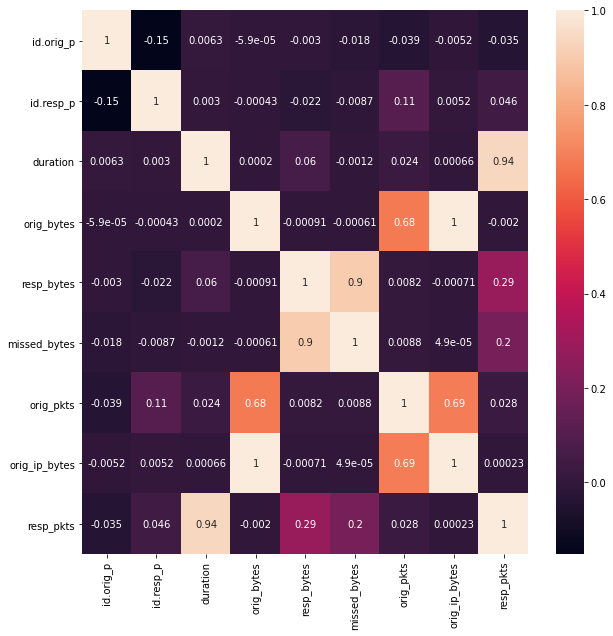

In [51]:
plt.figure(figsize=(10,10))
sn.heatmap(df.corr(),annot=True)

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns :
  if df[col].dtype.name=='category' :
    df[col] = le.fit_transform(df[col])


In [53]:
df['id.orig_h'] = df['id.orig_h'].astype(np.int8)
df['id.orig_p'] = df['id.orig_p'].astype(np.int64)
df['id.resp_h'] = df['id.resp_h'].astype(np.int8)
df['id.resp_p'] = df['id.resp_p'].astype(np.int8)
df['proto'] = df['proto'].astype(np.int8)

In [54]:
df.head(2)

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,label,detailed-label
0,1,41040,10,80,0,3,3.138672,0.000000,0.000000,2,0,6,3,180,0,0,1
1,1,41040,10,80,0,3,22.812500,14788.684646,350.429431,2,0,6,1,60,0,0,1


In [55]:
df['detailed-label'].value_counts()

1    16317
0     6706
2      122
Name: detailed-label, dtype: int64

In [56]:
df.columns

Index(['id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'service',
       'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'missed_bytes',
       'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'label',
       'detailed-label'],
      dtype='object')

In [91]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(df.drop(['detailed-label','orig_bytes','resp_bytes','missed_bytes'],axis=1), df['detailed-label'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [92]:
pd.Series(y_smt).value_counts()

0    16317
2    16293
1    16293
dtype: int64

In [93]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.2, random_state=1)



# **Steps Involved in the PCA**


```
Step 1: Standardize the dataset.
Step 2: Calculate the covariance matrix for the features in the dataset.
Step 3: Calculate the eigenvalues and eigenvectors for the covariance matrix.
Step 4: Sort eigenvalues and their corresponding eigenvectors.
Step 5: Pick k eigenvalues and form a matrix of eigenvectors.
Step 6: Transform the original matrix.
```



In [94]:
#Step 1: Standardize the dataset.
X_scaled = sc.fit_transform(X_train)
X_scaled_test = sc.transform(X_test)


In [95]:
X_scaled[0]

array([ 0.00505586,  0.85060621, -1.07863357,  0.98757085, -0.20049785,
        0.06337784,  0.0061047 , -1.3280089 , -1.09343   , -0.17031085,
       -0.02817236, -0.09256158,  0.199883  ])

In [81]:
#Step 2: Calculate the covariance matrix for the features in the dataset.
mean_vec = np.mean(X_scaled, axis=0)
cov_mat = (X_scaled - mean_vec).T.dot((X_scaled - mean_vec)) / (X_scaled.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00002556e+00  1.85844383e-03  8.28409400e-04  4.50482293e-03
   1.01048131e-03 -3.37437784e-04 -8.61964616e-03 -1.39293005e-02
   1.67135768e-04 -6.99133835e-04 -1.76088377e-05 -1.34358205e-01
   2.52163699e-02]
 [ 1.85844383e-03  1.00002556e+00 -6.46705601e-01 -8.34137782e-02
  -4.14268758e-01  9.48572138e-03  4.77584911e-03 -4.63549971e-01
  -2.21047098e-01 -1.37719463e-01 -1.35022245e-02  1.08560580e-02
   4.10455241e-01]
 [ 8.28409400e-04 -6.46705601e-01  1.00002556e+00 -5.02559047e-02
   8.69655437e-02  1.79524078e-02 -1.44356312e-03  4.44860102e-01
   3.09029606e-01  1.97242753e-01  1.61328030e-02 -3.28446815e-02
  -8.81311035e-02]
 [ 4.50482293e-03 -8.34137782e-02 -5.02559047e-02  1.00002556e+00
   4.02539615e-01 -1.01030161e-02 -3.26594092e-03 -5.37221160e-01
  -6.70243124e-01  1.41349954e-02 -1.60953448e-02 -9.54169780e-02
  -4.09721543e-01]
 [ 1.01048131e-03 -4.14268758e-01  8.69655437e-02  4.02539615e-01
   1.00002556e+00 -3.25946804e-01 -7.64359267e-

Text(0.5, 1.0, 'Correlation between different features')

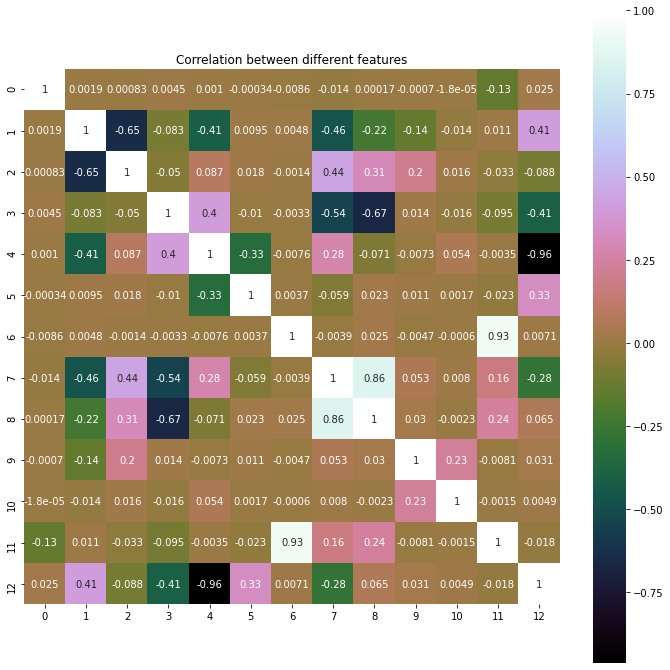

In [86]:
plt.figure(figsize=(12,12))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

In [90]:
#Step 3: Calculate the eigenvalues and eigenvectors for the covariance matrix.
eig_vals, eig_vecs =np.linalg.eig(cov_mat)
print(pd.DataFrame(eig_vecs))
eig_vals,  

          0         1         2   ...        10        11        12
0   0.017309  0.012123 -0.104251  ... -0.074250 -0.054197  0.000412
1   0.433649 -0.124045  0.104657  ...  0.002359  0.003268 -0.048724
2  -0.365241 -0.057082 -0.167851  ... -0.095020 -0.033612  0.118161
3   0.130144  0.507984  0.107688  ...  0.110172  0.066911 -0.214257
4  -0.330828  0.461878  0.087784  ... -0.308243  0.638774  0.123164
5   0.124243 -0.193398 -0.081431  ... -0.026383 -0.018338  0.054550
6  -0.059493 -0.118330  0.673142  ...  0.597585  0.260477 -0.054590
7  -0.509021 -0.223465 -0.083597  ...  0.041248 -0.033946 -0.775096
8  -0.376092 -0.404622 -0.066346  ...  0.203718  0.153451  0.516746
9  -0.083249 -0.017366 -0.077194  ...  0.009237 -0.004889  0.008094
10 -0.027322  0.006586 -0.023484  ...  0.019166 -0.035855 -0.006524
11 -0.122208 -0.179024  0.665716  ... -0.634165 -0.272839  0.040292
12  0.331253 -0.460840 -0.099355  ... -0.273269  0.644032 -0.217028

[13 rows x 13 columns]


(array([2.91145241, 2.571584  , 1.91980257, 1.34536391, 0.9980521 ,
        1.12714214, 0.82007403, 0.67593713, 0.300207  , 0.217288  ,
        0.02042664, 0.03895155, 0.05405079]),)

In [97]:
#Step 4: Sort eigenvalues and their corresponding eigenvectors.
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])


Eigenvalues in descending order:
2.9114524067737717
2.5715840024793777
1.919802570770896
1.3453639135879716
1.1271421406364555
0.9980521031909216
0.820074028893256
0.6759371315094537
0.300207001573756
0.21728800272513452
0.05405078943709106
0.0389515467606554
0.02042663852414061


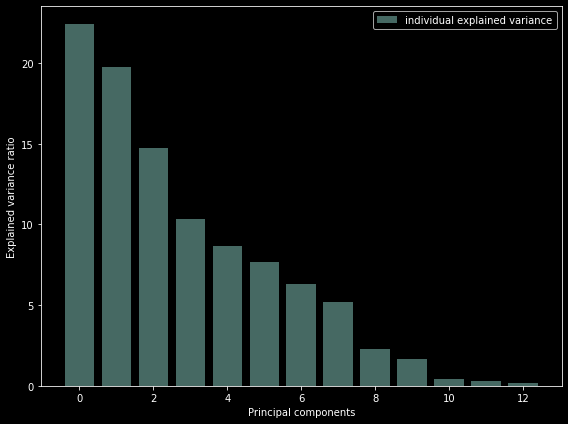

In [101]:
#Step 5: Pick k eigenvalues and form a matrix of eigenvectors.
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 6))

    plt.bar(range(13), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [102]:
eig_pairs[0][1]

array([ 0.01730906,  0.43364889, -0.36524085,  0.13014432, -0.33082773,
        0.12424253, -0.0594928 , -0.50902079, -0.37609246, -0.08324865,
       -0.0273221 , -0.12220815,  0.33125316])

In [103]:
eig_pairs[0][1].reshape(13,1)

array([[ 0.01730906],
       [ 0.43364889],
       [-0.36524085],
       [ 0.13014432],
       [-0.33082773],
       [ 0.12424253],
       [-0.0594928 ],
       [-0.50902079],
       [-0.37609246],
       [-0.08324865],
       [-0.0273221 ],
       [-0.12220815],
       [ 0.33125316]])

In [111]:
[eig_pairs[i][1].reshape(13,1) for i in range(13)]

In [112]:
#Step 6: Transform the original matrix.
matrix_w = np.hstack(tuple([eig_pairs[i][1].reshape(13,1) for i in range(6)]))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 1.73090623e-02  1.21231321e-02 -1.04250903e-01 -9.28879141e-03
   8.64140746e-03  9.88940022e-01]
 [ 4.33648886e-01 -1.24044886e-01  1.04657103e-01 -2.73648456e-01
  -2.95822245e-01 -8.39860337e-05]
 [-3.65240849e-01 -5.70820604e-02 -1.67851029e-01  3.73940738e-01
   3.10206488e-01  3.05030279e-03]
 [ 1.30144318e-01  5.07984133e-01  1.07687706e-01  2.39728057e-01
   2.08479415e-01  8.27924867e-04]
 [-3.30827733e-01  4.61878445e-01  8.77840706e-02 -1.41728084e-01
  -1.07545978e-01  1.42106115e-02]
 [ 1.24242532e-01 -1.93397741e-01 -8.14314401e-02  3.36148371e-01
   4.28718172e-01 -4.11944454e-02]
 [-5.94928046e-02 -1.18329604e-01  6.73142404e-01  1.56659947e-01
   7.74854641e-02  1.40324666e-01]
 [-5.09020794e-01 -2.23464905e-01 -8.35965569e-02 -1.66881684e-01
  -5.75012926e-02 -5.76934365e-03]
 [-3.76092459e-01 -4.04621990e-01 -6.63457811e-02 -1.85066640e-01
  -8.54329780e-02  1.05811823e-02]
 [-8.32486524e-02 -1.73658636e-02 -7.71944463e-02  5.73530944e-01
  -3.59435660e

In [113]:
Y = X_scaled.dot(matrix_w)
Y

array([[ 2.14496747,  1.01862168,  0.47313271, -0.00513776, -0.06927129,
        -0.00405501],
       [-0.78859299, -0.23258293, -0.39013194,  0.57696011,  0.72787205,
         0.00654727],
       [-0.22113138, -0.39490483, -0.25318038,  0.21887088,  0.34076678,
         0.00643736],
       ...,
       [-2.2465456 ,  2.08790142,  0.19649505, -0.50121169,  0.18338618,
        -0.05809196],
       [ 2.14496747,  1.01862168,  0.47313271, -0.00513776, -0.06927129,
        -0.00405501],
       [-0.65770543, -0.2700232 , -0.35854345,  0.49436523,  0.63858449,
         0.00652192]])

##Even with manual approach we approached nearer to the eigen values in comparision with sklearn PCA

In [123]:
[i/100 for i in var_exp]

[0.22395215328114182,
 0.19780909808406283,
 0.14767334633343426,
 0.10348688671460807,
 0.08670102553012951,
 0.07677127645169407,
 0.06308100527190129,
 0.05199383501238974,
 0.023092256042412416,
 0.01671403454139777,
 0.004157646765174381,
 0.0029961962456897164,
 0.0015712397259641255]

In [119]:
(pca.explained_variance_ratio_)

array([0.22409827, 0.19681157, 0.14725868, 0.10350623, 0.08665451,
       0.07675076, 0.06379437, 0.05177486, 0.02325129, 0.01689124,
       0.00422633, 0.00321606, 0.00176586])

# Could see in both approaches we were approached to prove that 90% varience is at 6 principle components

Text(0, 0.5, 'Cumulative explained variance')

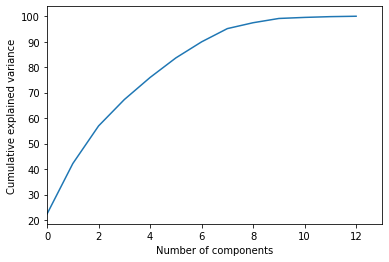

In [120]:
plt.plot(np.cumsum(var_exp))
plt.xlim(0,X_scaled.shape[1],1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Text(0, 0.5, 'Cumulative explained variance')

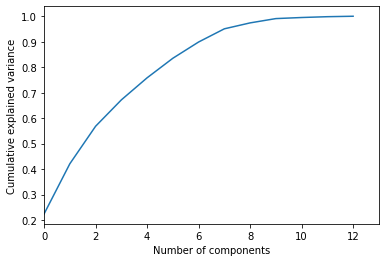

In [124]:
from sklearn.decomposition import  PCA
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,X_scaled.shape[1],1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**The above plot shows almost 90% variance by the first 6 components. Therfore we can drop remaining component.** 

In [115]:
sklearn_pca = PCA(n_components=6)
X_scaled_pca = sklearn_pca.fit_transform(X_scaled)

In [116]:
X_scaled_pca

array([[-2.13980391, -1.02799634,  0.47326779, -0.00312928,  0.07805988,
         0.00454776],
       [ 0.78743389,  0.23125802, -0.38965774,  0.56706143, -0.73343269,
        -0.0060557 ],
       [ 0.21848499,  0.39471804, -0.25270019,  0.21060506, -0.35319384,
        -0.00631898],
       ...,
       [ 2.25349889, -2.08041257,  0.20298248, -0.54298537, -0.20815646,
         0.05831128],
       [-2.13980391, -1.02799634,  0.47326779, -0.00312928,  0.07805988,
         0.00454776],
       [ 0.65620328,  0.2689608 , -0.35806787,  0.48484318, -0.6457289 ,
        -0.00611643]])

In [ ]:

model = LogisticRegression()
model.fit(X_scaled_pca, y_train)
y_pred = model.predict(sklearn_pca.transform(X_scaled_test))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
list=list1 = [[21.9,1000,1.1,(21.9-1.1)*100/21.9,'No Change'],[21.9,4000,1.1,(21.9-1.1)*100/21.9,'No Change'],[21.9,8000,1.1,(21.9-1.1)*100/21.9,'No Change'],[21.9,10000,1.1,(21.9-1.1)*100/21.9,'No Change']]

In [ ]:
BenchMark = pd.DataFrame(list1,columns=['Actual size(MB)','Chunksize','Reduced Size(MB)','Percentage Reduced','Model Percentage'])

In [ ]:
BenchMark

**Conclusion : *Eventhough we have different chunck size and Data size will be same after concatinating the iterated data for different chucks. As we will get data with same size in all of different sized chuncks, there won't be any change in model accuracy*** 

